# Linear Regression: Predicting Movie Revenues

---

## Introduction

This dataset contains a wide range of Movies, each with their undividual names, genres, ratings on IMDB, budgets, incomes, and runtimes.

**Source:** Internet Movie Database (IMDB); dataset derived from https://www.kaggle.com/datasets/danielgrijalvas/movies/data

**Size:** Originally 7668 rows × 15 columns, reduced to 5421 rows x 15 columns


## [Potential] Columns of Interest:

- **name** = name of the movie
- **genre** = main genre of the movie
- **year** = release year
- **score** = IMDb user rating
- **budget** = the budget of the movie (in USD)
- **gross** = revenue of the movie (in USD)
- **runtime** = duration of the movie (in minutes)

In [1]:
# Importing packages and data
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://github.com/yosephhabtu/MC-DATA-201-Project-2/raw/main/movies.csv')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [2]:
# Identifying missing values
(df.isna().sum())

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [3]:
# Dropping all rows with missing values
df = df.dropna()
df.shape

(5421, 15)

In [4]:
# Descriptive statistics
df.describe()

,year,score,votes,budget,gross,runtime
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,10.540908,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


# EDA

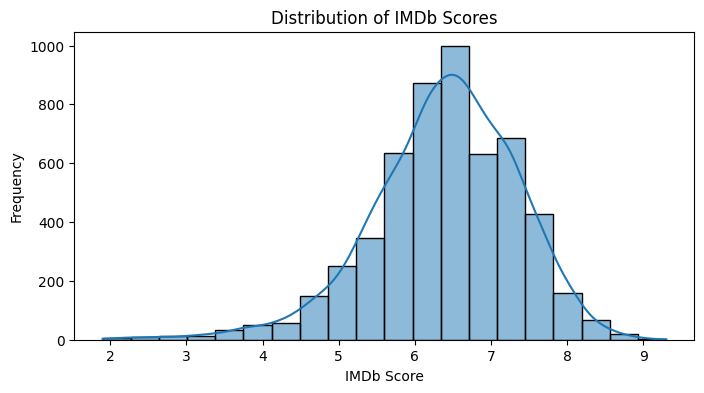

In [5]:
# Distribution of IMDB Scores
plt.figure(figsize=(8, 4))
sns.histplot(df['score'], bins=20, kde=True)
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.show()

# Linear Regression

In [6]:
# Defining and x and y variables for the linear regression
x = df[['budget', 'score']]
y = df['gross']
print(x.shape)
print(y.shape)

(5421, 2)
(5421,)


In [7]:
# Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)
print('Shape of train data:', (x_train.shape, y_train.shape))
print('Shape of test data:', (x_test.shape, y_test.shape))

Shape of train data: ((3794, 2), (3794,))
Shape of test data: ((1627, 2), (1627,))


In [8]:
# Fitting the the training data to a linear model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

# Using the model to predict the test data
y_predicted = model.predict(x_test)

In [9]:
# Measuring the accuracy of the model by calculating the Mean Squared Error(MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true = y_test, y_pred = y_predicted)
print('Mean Squared Error:', mse)

Mean Squared Error: 1.3724537175820964e+16


In [10]:
# R-squared value
r2 = model.score(x_test, y_test)
print('R-Squared:', r2)

R-Squared: 0.539526658787767
